In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

Text(0.5, 1.0, 'Data')

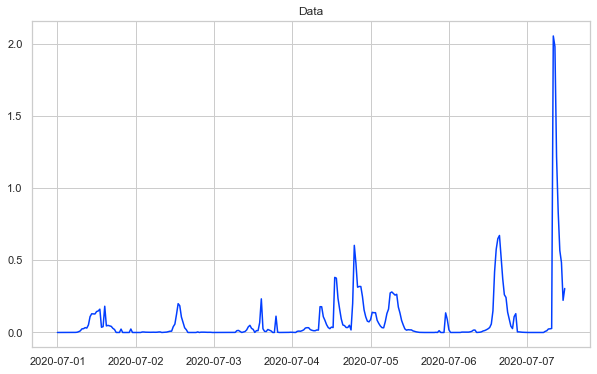

In [2]:
df = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
#plt.show()
sd = df.loc[(df['Date'].between('2020-07-01 00:00:00', '2020-07-07 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s = sd['value']
t = sd['Date']
plt.figure(figsize=(10,6))
plt.plot(t, s)
plt.title("Data")

Text(0.5, 1.0, 'Data')

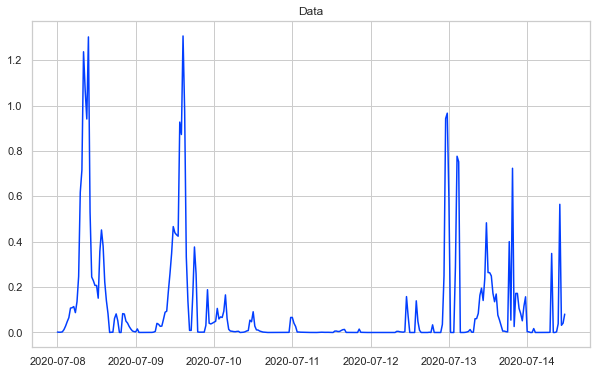

In [3]:
df1 = pd.read_csv(r"C:\Users\admin\Documents\Algo Asylum\Precipitation_Analysis\preci_all.csv")
df1.columns = ['Date','ddate','value','geo']
df1['Date'] = df1['Date'].astype(str).str[:-2].astype(str)
df1['Date'].iloc[43]
df1.columns
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y%m%d%H%M')
del df1['ddate'],df1['geo']
#plt.show()
sd1 = df1.loc[(df1['Date'].between('2020-07-08 00:00:00', '2020-07-14 11:30:00', inclusive=True))]
#sd['Date'] = pd.to_datetime(sd['Date'])
#y['date'] = y.groupby(y['date'].dt.date).sum()
#sd = sd.iloc[:, 1:]
s2 = sd1['value']
t2 = sd1['Date']
plt.figure(figsize=(10,6))
plt.plot(t2, s2)
plt.title("Data")

In [4]:
print(np.shape(s))
print(np.shape(s2))

(312,)
(312,)


In [5]:
from scipy.stats import wasserstein_distance

In [6]:
wasserstein_distance(s,s2)

0.034355845150200424

In [7]:
tf1 = np.arange(s.shape[0])
signal_1 = pd.DataFrame(zip(tf1,s),columns=['Time','Value'])
tf2 = np.arange(s2.shape[0])
signal_2 = pd.DataFrame(zip(tf2,s2),columns=['Time','Value'])

In [8]:
signal_1.equals(signal_2)

False

In [9]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [10]:
jaccard(signal_1,signal_2)

0.8972809667673716

# FFT - Real and Imag

In [11]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

<StemContainer object of 3 artists>

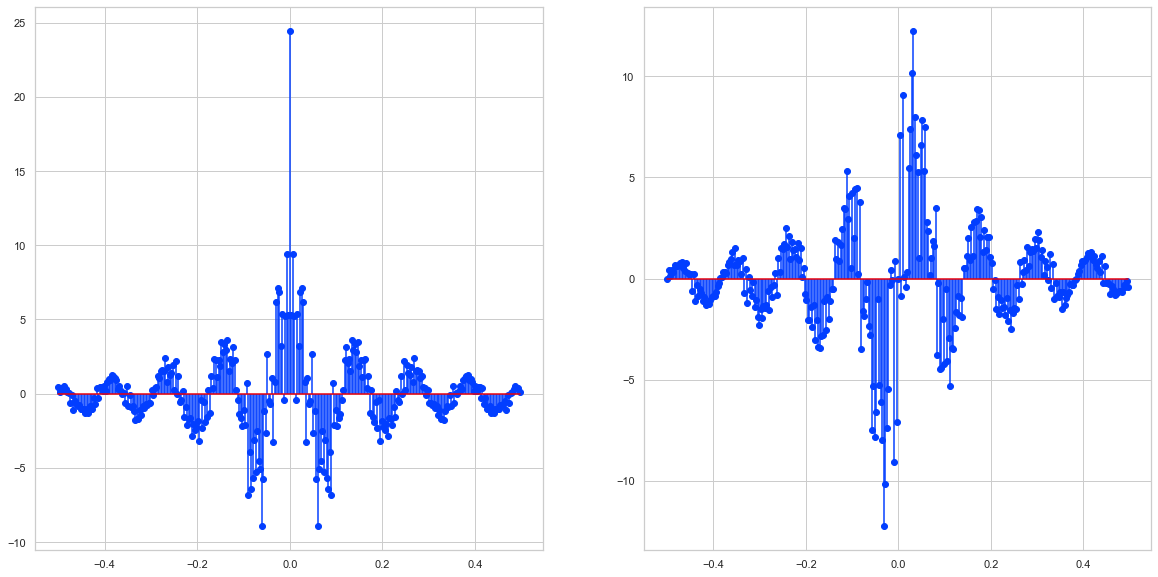

In [12]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

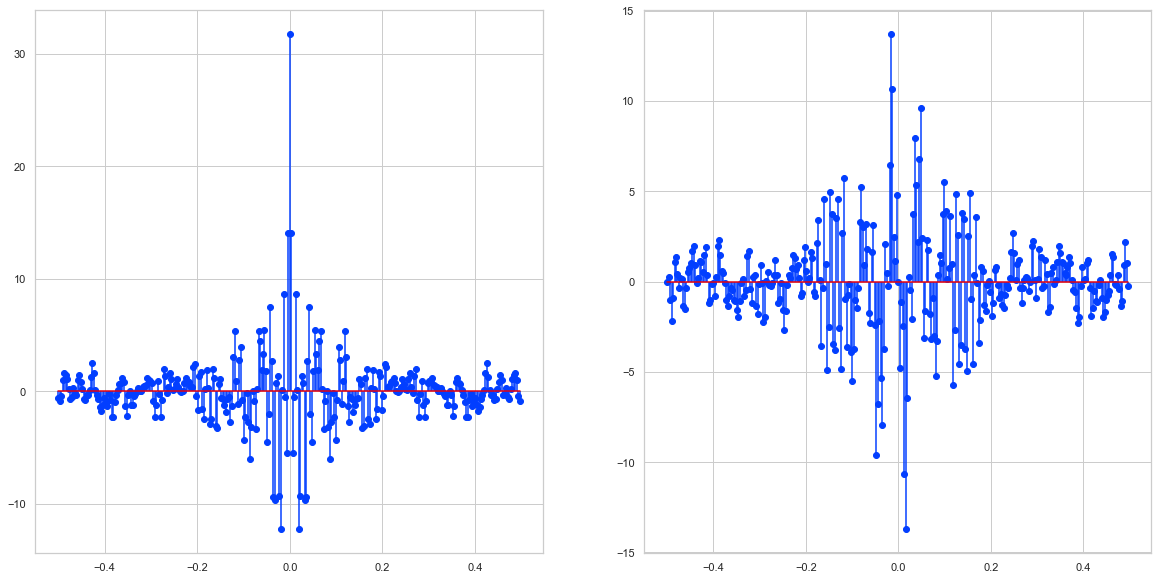

In [13]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [14]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  0.33572222393231405
Imaginary 0.18498041468017185


In [15]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8972809667673716


In [16]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8690476190476191


# FFT - Magnitude and phase

In [17]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [18]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

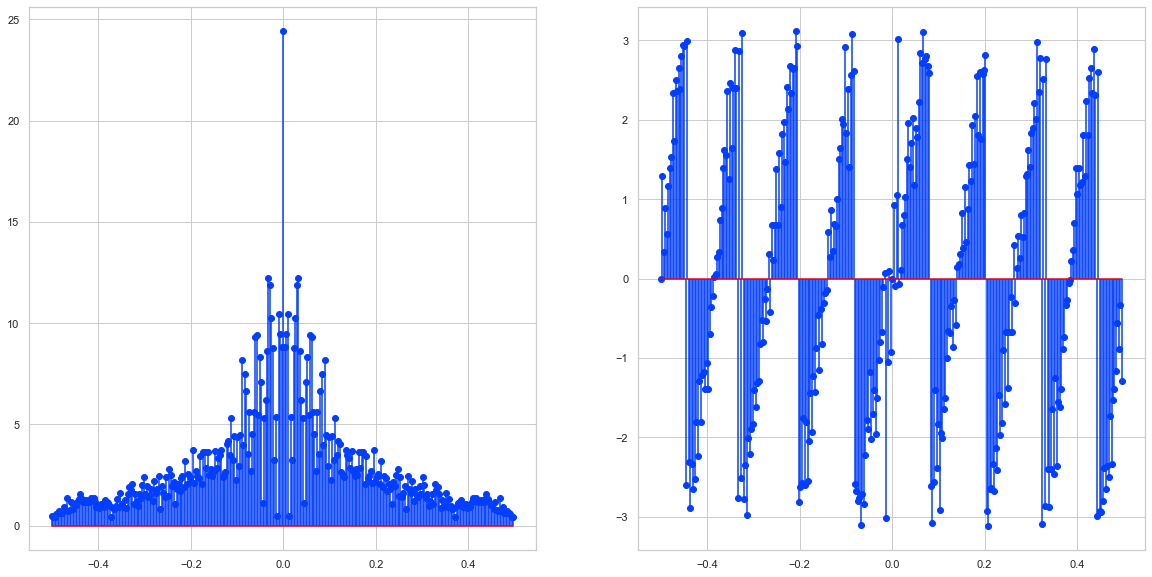

In [19]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

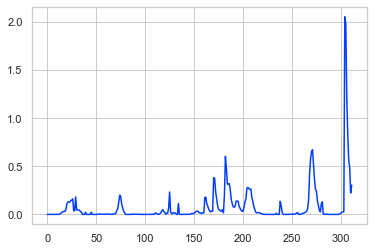

In [20]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [21]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

1.3207558541900479e-15

<StemContainer object of 3 artists>

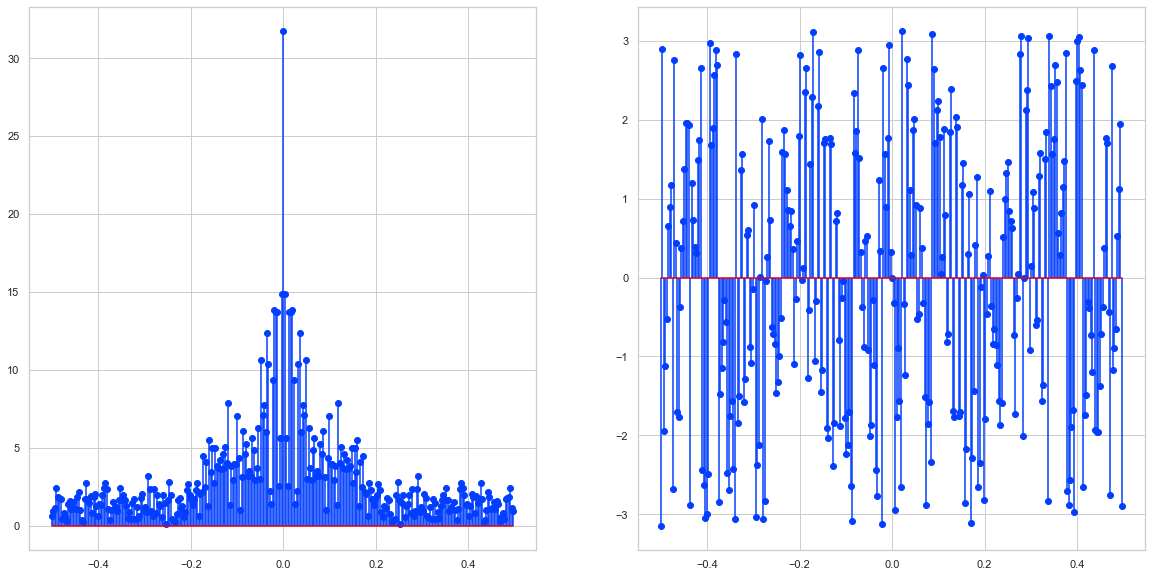

In [22]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

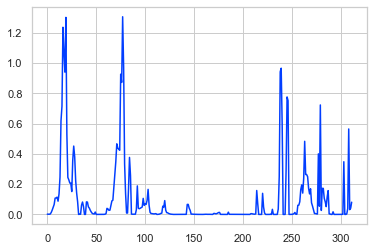

In [23]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [24]:
distance.euclidean(s2,ifft_mag_phase2)

1.442919840125525e-15

In [25]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  0.29103731063464294
Phase 0.10723030912416405


In [26]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8858858858858859


In [27]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.7493036211699164


# Cepstrum

In [28]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [29]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[ 7.13362517e-01  9.51161178e-01  1.17894951e-01  1.11238872e-01
  2.48482745e-02  6.56525624e-02 -6.13874098e-02  8.43103042e-02
 -1.44024904e-01  4.46233040e-02 -3.86558828e-02  3.72505125e-03
  3.30364654e-03 -5.99472857e-03 -2.44243384e-02  5.15228458e-03
 -3.43637596e-02 -2.84409480e-03 -1.90677409e-02 -1.78490971e-02
 -8.96572456e-03 -8.31656877e-04 -1.39119074e-02  2.26296745e-03
 -1.68061419e-02 -2.73426266e-03 -1.63579470e-02  3.67816488e-03
  1.91167364e-02  1.35530590e-02  7.94692809e-03  2.68568236e-02
  2.87882395e-02  2.22857938e-02  3.31595732e-02 -4.29306436e-02
  2.98657967e-02  7.28240972e-02 -4.31449155e-02  3.50176589e-02
  1.26478232e-02  1.02194323e-02  1.43944659e-02  7.72259107e-03
 -1.57342844e-02  1.57064152e-02 -1.69125825e-02  1.29720596e-02
 -6.34858946e-03  1.40893552e-02  8.52963692e-03  2.09674758e-02
  1.21455356e-02  3.85944107e-02  1.01642637e-02  1.89046882e-02
 -1.01122911e-02  3.08232808e-02  1.71392350e-02  1.71120888e-02
  1.53710976e-02  2.54193

In [30]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 6.36979347e-01  3.31268155e+00  4.50429562e+00  2.28871105e+00
  2.75511495e-01  2.52578157e-01 -1.06590410e+00 -8.89618910e-01
  1.82247742e-01  8.25210088e-01 -3.07591937e-02 -9.72718897e-02
 -6.55546877e-02 -1.39008978e-05 -1.22994578e-01  2.30857530e-01
 -9.07759625e-03 -9.90692588e-02 -1.91092545e-01  1.84142446e-01
  1.58178166e-01 -1.40234594e-01 -1.83563687e-02  3.28357974e-01
 -1.48471692e-01 -2.33234155e-02  1.35179974e-01 -4.31235747e-02
  2.21093623e-01 -5.83970476e-02  1.05509384e-01  9.61919347e-02
  2.07809822e-02 -1.65128278e-01 -7.88443511e-03  9.33001317e-02
  9.84216300e-02  1.34241390e-03 -5.28136454e-02 -5.10870096e-02
 -3.80176875e-02  4.61132541e-02 -5.79728002e-02 -1.43160676e-02
  2.09793304e-02  8.72747682e-02 -3.26423647e-02  3.94932005e-02
 -1.70233110e-01  9.47561792e-02 -3.19750734e-03  1.60424117e-03
  1.23121633e-01  4.93395045e-02 -8.68350933e-02 -7.16161746e-02
  1.49756136e-01  6.85447488e-02  2.41990983e-01  1.85128569e-01
  7.00677162e-02  1.51710

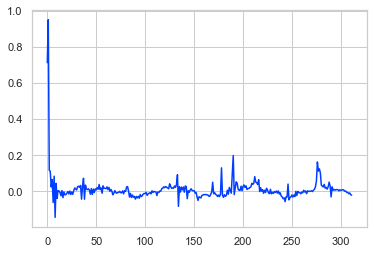

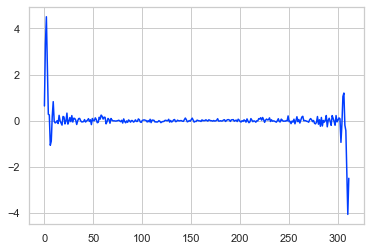

In [31]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [32]:
print(wasserstein_distance(ceps1,ceps2))

0.11253668052455351


In [33]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [34]:
print(jaccard(cepstrum1,cepstrum2))

0.8690476190476191


## Results

In [35]:
from prettytable import PrettyTable

+-------------+---------------+---------------+----------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD          |      Jaccard       |
+-------------+---------------+---------------+----------------------+--------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 0.034355845150200424 | 0.8972809667673716 |
+-------------+---------------+---------------+----------------------+--------------------+


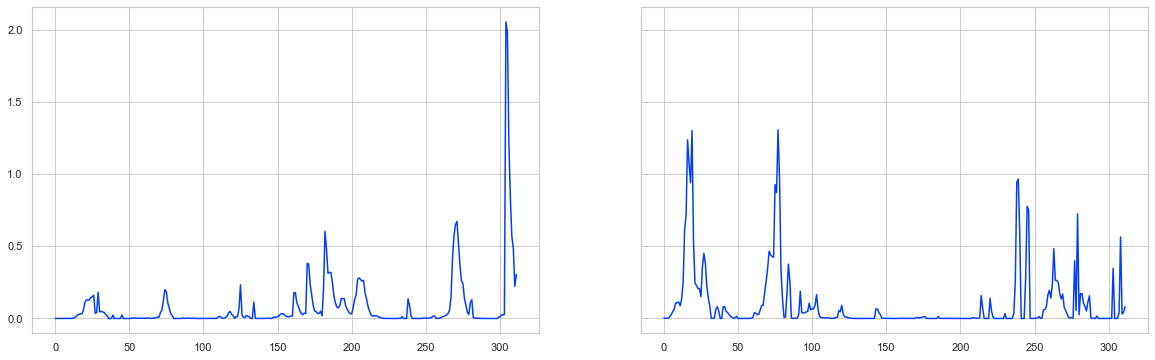

In [36]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 0.33572222393231405 | 0.8972809667673716 |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 0.18498041468017185 | 0.8690476190476191 |
+-------------+---------------+---------------+---------------------+--------------------+


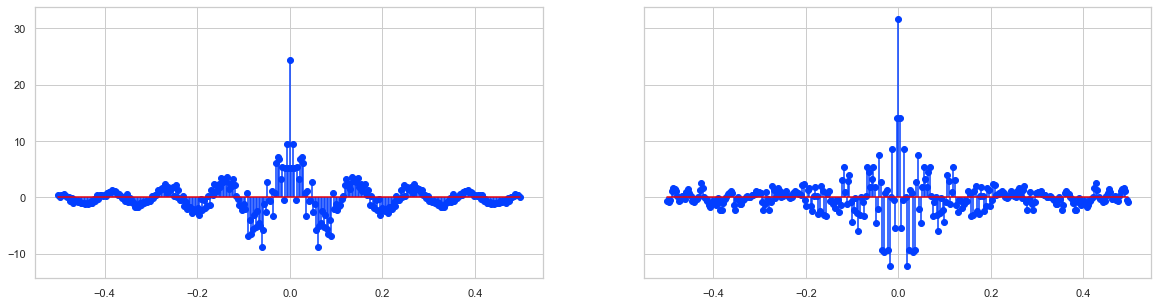

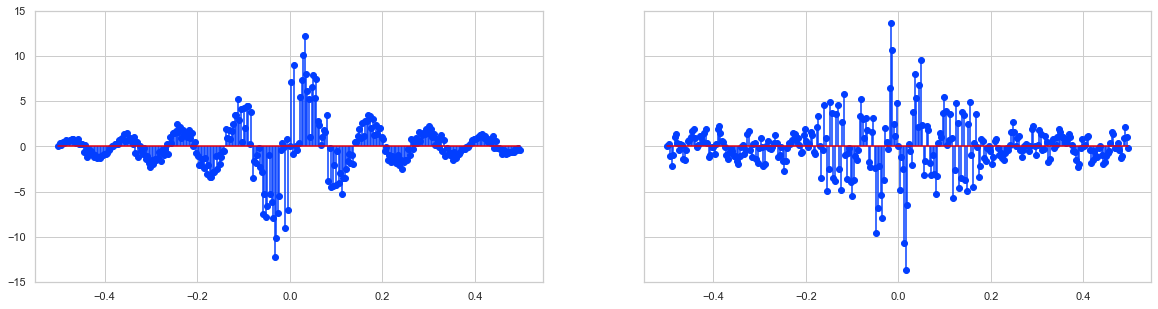

In [40]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',0.33572222393231405,0.8972809667673716])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',0.18498041468017185, 0.8690476190476191])
print(table2)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 | 0.29103731063464294 | 0.8858858858858859 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.10723030912416405 | 0.7493036211699164 |
+-------------+---------------+---------------+---------------------+--------------------+


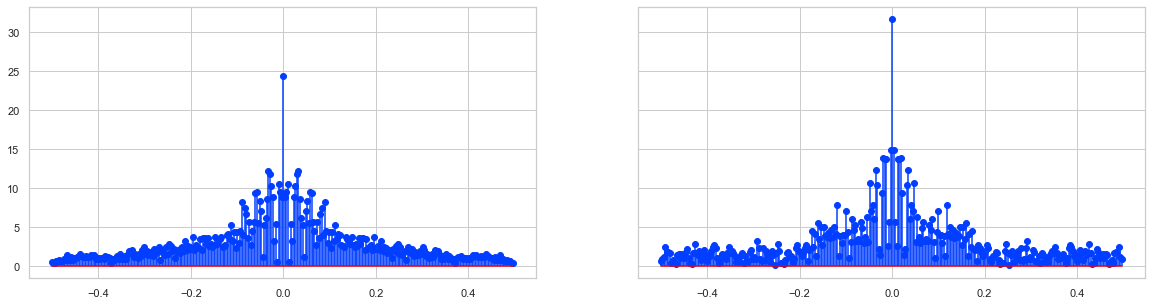

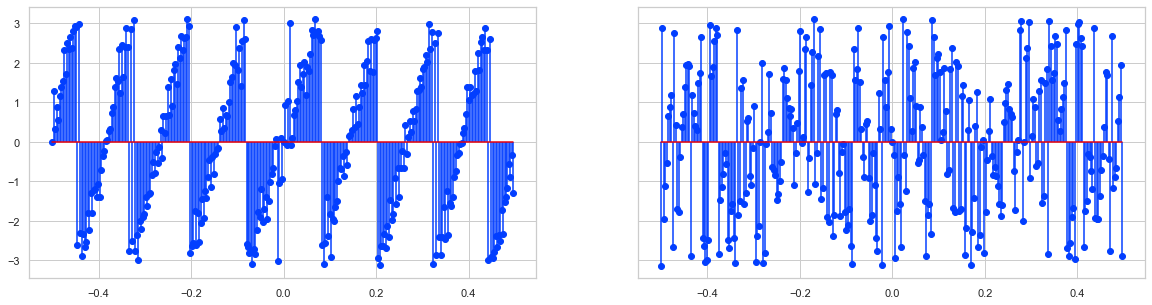

In [41]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
#axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
#axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',0.29103731063464294,0.8858858858858859])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.10723030912416405,0.7493036211699164])
print(table3)

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
|   Cepstrum  | Multi Sines 1 | Multi Sines 2 | 0.11253668052455351 | 0.8690476190476191 |
+-------------+---------------+---------------+---------------------+--------------------+


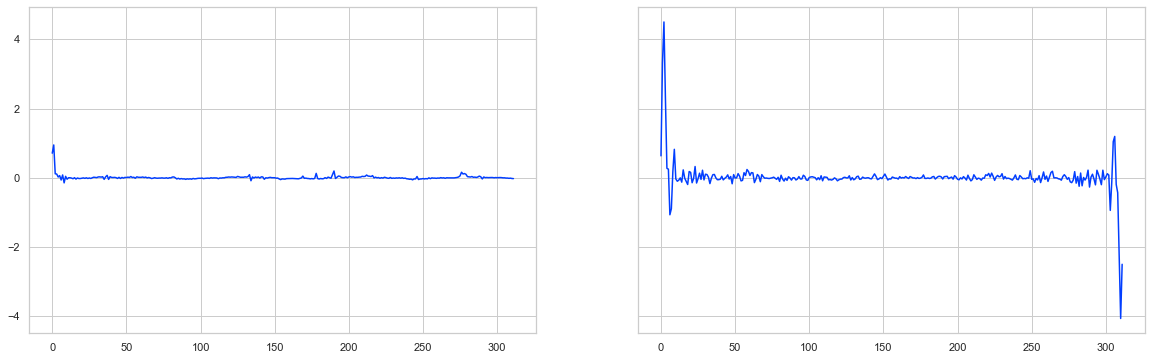

In [39]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)